In [1]:
# I was bored at work. So I code for fun.
# https://en.wikipedia.org/wiki/Fractal

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pprint import pprint

import math
import numpy as np
import scipy
import pandas as pd

from utils import create_unique_color_uchar

#### Fibonacci Spiral

<IPython.core.display.Javascript object>


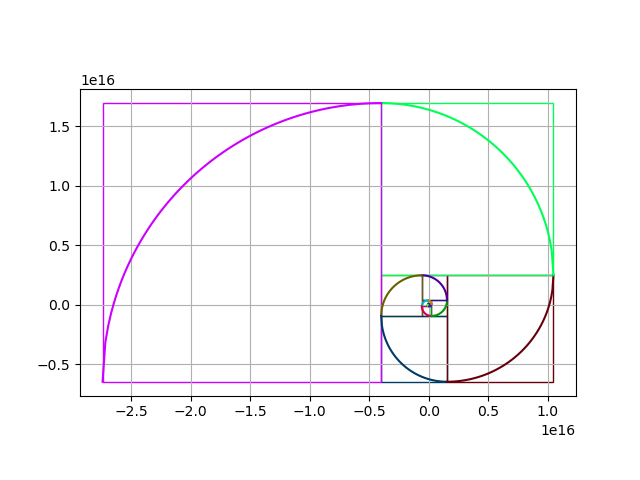

 2. 1.0 / 1.0 = 1.0
 3. 2.0 / 1.0 = 2.0
 4. 3.0 / 2.0 = 1.5
 5. 5.0 / 3.0 = 1.6666666666666667
 6. 8.0 / 5.0 = 1.6
 7. 13.0 / 8.0 = 1.625
 8. 21.0 / 13.0 = 1.6153846153846154
 9. 34.0 / 21.0 = 1.619047619047619
10. 55.0 / 34.0 = 1.6176470588235294
11. 89.0 / 55.0 = 1.6181818181818182
12. 144.0 / 89.0 = 1.6179775280898876
13. 233.0 / 144.0 = 1.6180555555555556
14. 377.0 / 233.0 = 1.6180257510729614
15. 610.0 / 377.0 = 1.6180371352785146
16. 987.0 / 610.0 = 1.618032786885246
17. 1597.0 / 987.0 = 1.618034447821682
18. 2584.0 / 1597.0 = 1.6180338134001253
19. 4181.0 / 2584.0 = 1.618034055727554
20. 6765.0 / 4181.0 = 1.6180339631667064
21. 10946.0 / 6765.0 = 1.6180339985218033
22. 17711.0 / 10946.0 = 1.618033985017358
23. 28657.0 / 17711.0 = 1.6180339901755971
24. 46368.0 / 28657.0 = 1.618033988205325
25. 75025.0 / 46368.0 = 1.618033988957902
26. 121393.0 / 75025.0 = 1.6180339886704431
27. 196418.0 / 121393.0 = 1.6180339887802426
28. 317811.0 / 196418.0 = 1.618033988738303
29. 514229.0 / 31

In [2]:
# Fibonacci spiral with Dynamic Programming style

# Plotting prepare
fig = plt.figure()
axe = fig.add_subplot(111)

# Directions matrix for calculating bottom-left of k-th square
# wrt [[fibo[k-1], fibo[k-1]], [fibo[k], fibo[k]]]
D = np.array(
    [
        [[0, 0], [-1, 0]],  # left
        [[0, 0], [0, -1]],  # down
        [[1, 0], [0, 0]],  # right
        [[0, 1], [0, 0]],  # up
    ]
)

# 1/4 of the circle for k-th square
HalfCircle = lambda x, r: (r ** 2 - x ** 2) ** 0.5
# Directions matrix for calculating centroid
D_centroid = np.array([[1, 0], [1, 1], [0, 1], [0, 0]])  # left  # down  # right  # up
# Directions matrix of X range wrt [r, r]
# ignore point [0, 0] for the sake of simple
D_X = np.array(
    [
        [-1, 0],  # left  => top-left
        [-1, 0],  # down  => bottom-left
        [0, 1],  # right => bottom-right
        [0, 1],  # up    => top-right
    ]
)
# Directions matrix of Y range wrt to Y range
D_Y = np.array(
    [
        1,  # left  => top-left
        -1,  # down  => bottom-left
        -1,  # right => bottom-right
        1,  # up    => top-right
    ]
)

# Init Fibonacci sequence
n = 80
fibo = np.array([None] * (n + 1), np.float128)
fibo[0], fibo[1] = 0, 1

# 1st Fibonacci
k = 1
bl = bl_prev = np.array([0, 0])
color = np.array(create_unique_color_uchar(k)) / 255
axe.add_patch(
    patches.Rectangle(bl, width=fibo[k], height=fibo[k], fill=False, color=color)
)

# k-th Fibonacci
for k in range(2, n + 1):
    fibo[k] = fibo[k - 1] + fibo[k - 2]
    direction = k % 4

    # square's bottom-left
    bl = (
        bl_prev
        + D[direction][0] * [fibo[k - 1], fibo[k - 1]]
        + D[direction][1] * [fibo[k], fibo[k]]
    )

    # 1/4 circle
    centroid = bl + D_centroid[direction] * [fibo[k], fibo[k]]
    low, high = [fibo[k], fibo[k]] * D_X[direction]
    X = np.linspace(low, high, 100)
    Y = HalfCircle(X, fibo[k]) * D_Y[direction]

    # Plot
    color = np.array(create_unique_color_uchar(k)) / 255
    axe.add_patch(
        patches.Rectangle(bl, width=fibo[k], height=fibo[k], fill=False, color=color)
    )
    axe.plot(X + centroid[0], Y + centroid[1], color=color)
    print("{:2d}. {} / {} = {}".format(k, fibo[k], fibo[k - 1], fibo[k] / fibo[k - 1]))

    # Update k-th specific parameters
    bl_prev = np.min([bl_prev, bl], axis=0)

print("Golden ratio: {}".format((1 + 5 ** 0.5) / 2))

# Show
axe.set_aspect("equal")
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


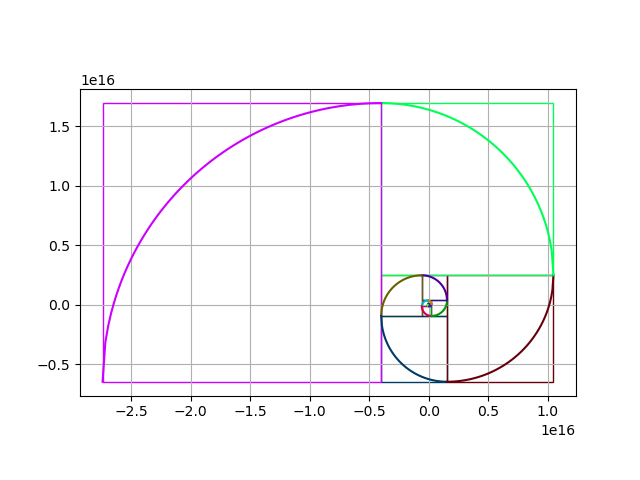

 2. 1.0 / 1.0 = 1.0
 3. 2.0 / 1.0 = 2.0
 4. 3.0000000000000004 / 2.0 = 1.5000000000000002
 5. 5.000000000000001 / 3.0000000000000004 = 1.6666666666666667
 6. 8.000000000000002 / 5.000000000000001 = 1.6
 7. 13.000000000000002 / 8.000000000000002 = 1.6249999999999998
 8. 21.000000000000004 / 13.000000000000002 = 1.6153846153846154
 9. 34.00000000000001 / 21.000000000000004 = 1.619047619047619
10. 55.000000000000014 / 34.00000000000001 = 1.6176470588235294
11. 89.00000000000003 / 55.000000000000014 = 1.6181818181818184
12. 144.00000000000006 / 89.00000000000003 = 1.6179775280898878
13. 233.00000000000006 / 144.00000000000006 = 1.6180555555555554
14. 377.00000000000017 / 233.00000000000006 = 1.6180257510729616
15. 610.0000000000003 / 377.00000000000017 = 1.6180371352785148
16. 987.0000000000005 / 610.0000000000003 = 1.6180327868852458
17. 1597.000000000001 / 987.0000000000005 = 1.618034447821682
18. 2584.000000000002 / 1597.000000000001 = 1.6180338134001255
19. 4181.000000000003 / 2584.000

In [3]:
# Fibonacci spiral calculated with Golden Ratio

# Plotting prepare
fig = plt.figure()
axe = fig.add_subplot(111)

# Directions matrix for calculating bottom-left of k-th square
# wrt [[fibo_k_1, fibo_k_1], [fibo_k, fibo_k]]
D = np.array(
    [
        [[0, 0], [-1, 0]],  # left
        [[0, 0], [0, -1]],  # down
        [[1, 0], [0, 0]],  # right
        [[0, 1], [0, 0]],  # up
    ]
)

# 1/4 of the circle for k-th square
HalfCircle = lambda x, r: (r ** 2 - x ** 2) ** 0.5
# Directions matrix for calculating centroid
D_centroid = np.array([[1, 0], [1, 1], [0, 1], [0, 0]])  # left  # down  # right  # up
# Directions matrix of X range wrt [r, r]
# ignore point [0, 0] for the sake of simple
D_X = np.array(
    [
        [-1, 0],  # left  => top-left
        [-1, 0],  # down  => bottom-left
        [0, 1],  # right => bottom-right
        [0, 1],  # up    => top-right
    ]
)
# Directions matrix of Y range wrt to Y range
D_Y = np.array(
    [
        1,  # left  => top-left
        -1,  # down  => bottom-left
        -1,  # right => bottom-right
        1,  # up    => top-right
    ]
)

# Closed-form expression of Fibonacci sequence
phi = (1 + 5 ** 0.5) / 2
Fibo = lambda k: (phi ** k - (-phi) ** -k) / 5 ** 0.5
n = 80

# 1st Fibonacci
k = 1
fibo_k = fibo_k_1 = Fibo(k)
bl = bl_prev = np.array((0, 0))
color = np.array(create_unique_color_uchar(k)) / 255
axe.add_patch(
    patches.Rectangle(bl, width=fibo_k, height=fibo_k, fill=False, color=color)
)

# k-th Fibonacci
for k in range(2, n + 1):
    fibo_k = Fibo(k)
    direction = k % 4

    # square's bottom-left
    bl = (
        bl_prev
        + D[direction][0] * [fibo_k_1, fibo_k_1]
        + D[direction][1] * [fibo_k, fibo_k]
    )

    # 1/4 circle
    centroid = bl + D_centroid[direction] * [fibo_k, fibo_k]
    low, high = [fibo_k, fibo_k] * D_X[direction]
    X = np.linspace(low, high, 100)
    Y = HalfCircle(X, fibo_k) * D_Y[direction]

    # Plot
    color = np.array(create_unique_color_uchar(k)) / 255
    axe.add_patch(
        patches.Rectangle(bl, width=fibo_k, height=fibo_k, fill=False, color=color)
    )
    axe.plot(X + centroid[0], Y + centroid[1], color=color)
    print("{:2d}. {} / {} = {}".format(k, fibo_k, fibo_k_1, fibo_k / fibo_k_1))

    # Update k-th specific parameters
    bl_prev = np.min([bl_prev, bl], axis=0)
    fibo_k_1 = fibo_k

print("Golden ratio: {}".format((1 + 5 ** 0.5) / 2))

# Show
axe.set_aspect("equal")
plt.grid(True)
plt.show()